In [17]:
import torch
import pandas as pd
from deep_learning.loaders.feature_dataset import FeatureDataset
from deep_learning.models.attention_core.clam import Clam
from deep_learning.services.attention_score_service import *
from torch.utils.data import DataLoader
from deep_learning.services.file_and_data_service import FileDataService
from deep_learning.services.attention_visualization_service import ImageComposer

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

import json

model=Clam(
    feature_vector_length=1280,
    dropout=0.1,
    k_sample=8,
    n_classes=6,
    subtyping=False
)

model.load_state_dict(torch.load("F:/logs/effnet_clam/20250306_223024_p7_b75/model_weights_4.pth"))

df=pd.read_csv("F:/data/train_stratified.csv")
feature_path="F:/extracted_features_effnet"
dataset=FeatureDataset(df,feature_path)
data_loader=DataLoader(dataset, batch_size=1, shuffle=True,num_workers=0)

model.to(device)
model.eval()
statlist=[]
print(f"Data Length: {len(data_loader)}")
for count,( features,label) in enumerate(data_loader):
    features=features.squeeze()
    Y_prob,A=get_attention_scores(model, features,1,False)
    stats=get_statistics_from_attention_scores(A)
    stats={"label":Y_prob.argmax().item(),**stats}
    statlist.append(stats)
    if count%100==0:
        print(f"{count} Done")
print("Finished")


Data Length: 8154
0 Done
100 Done
200 Done
300 Done
400 Done
500 Done
600 Done
700 Done
800 Done
900 Done
1000 Done
1100 Done
1200 Done
1300 Done
1400 Done
1500 Done
1600 Done
1700 Done
1800 Done
1900 Done
2000 Done
2100 Done
2200 Done
2300 Done
2400 Done
2500 Done
2600 Done
2700 Done
2800 Done
2900 Done
3000 Done
3100 Done
3200 Done
3300 Done
3400 Done
3500 Done
3600 Done
3700 Done
3800 Done
3900 Done
4000 Done
4100 Done
4200 Done
4300 Done
4400 Done
4500 Done
4600 Done
4700 Done
4800 Done
4900 Done
5000 Done
5100 Done
5200 Done
5300 Done
5400 Done
5500 Done
5600 Done
5700 Done
5800 Done
5900 Done
6000 Done
6100 Done
6200 Done
6300 Done
6400 Done
6500 Done
6600 Done
6700 Done
6800 Done
6900 Done
7000 Done
7100 Done
7200 Done
7300 Done
7400 Done
7500 Done
7600 Done
7700 Done
7800 Done
7900 Done
8000 Done
8100 Done
Finished


In [20]:
print(statlist[0])

{'label': 4, 0: {'min': -3.9742925, 'max': 6.107922, 'mean': -0.82764834, 'std': 2.4649155}, 1: {'min': -4.3057766, 'max': 5.747993, 'mean': -1.1229044, 'std': 2.4618886}, 2: {'min': -3.2098827, 'max': 3.8050787, 'mean': -0.8149565, 'std': 1.6727284}, 3: {'min': -2.8839116, 'max': 2.941012, 'mean': -0.8170596, 'std': 1.7022779}, 4: {'min': -4.045453, 'max': 4.3895817, 'mean': -0.61383337, 'std': 2.239452}, 5: {'min': -2.2650487, 'max': 2.9953916, 'mean': 0.11885769, 'std': 1.1675836}}


In [21]:
import numpy as np
stats={}
for i in range(6):
    print(f"Calculate {i} stats")
    labeled= list(filter(lambda x: x['label']==i,statlist))
    length=len(labeled)
    result_dict={j:{"min":np.zeros(length, dtype=float), "max":np.zeros(length, dtype=float), "mean":np.zeros(length, dtype=float), "std":np.zeros(length, dtype=float)} for j in range(6)}
    for index, data in enumerate(labeled):
        for k in range(6):
            result_dict[k]["min"][index]=data[k]['min']
            result_dict[k]["max"][index]=data[k]['max']
            result_dict[k]["mean"][index]=data[k]['mean']
            result_dict[k]["std"][index]=data[k]['std']
    for k in range(6):
        min_vector=result_dict[k]["min"]
        result_dict[k]['min']={
            'min':min_vector.min(),
            'max':min_vector.max(),
            'mean':min_vector.mean(),
            'std':min_vector.std(),
        }
        max_vector=result_dict[k]["max"]
        result_dict[k]['max']={
            'min':max_vector.min(),
            'max':max_vector.max(),
            'mean':max_vector.mean(),
            'std':max_vector.std(),
        }
        mean_vector=result_dict[k]["mean"]
        result_dict[k]['mean']={
            'min':mean_vector.min(),
            'max':mean_vector.max(),
            'mean':mean_vector.mean(),
            'std':mean_vector.std(),
        }        
        std_vector=result_dict[k]["std"]
        result_dict[k]['std']={
            'min':std_vector.min(),
            'max':std_vector.max(),
            'mean':std_vector.mean(),
            'std':std_vector.std(),
        }
    stats[i]=result_dict
    print(f"Done {i} stats")

Calculate 0 stats
Done 0 stats
Calculate 1 stats
Done 1 stats
Calculate 2 stats
Done 2 stats
Calculate 3 stats
Done 3 stats
Calculate 4 stats
Done 4 stats
Calculate 5 stats
Done 5 stats


In [25]:
def print_stats(data):
    print(f"\t\t\tMin:{data['min']}")
    print(f"\t\t\tMax:{data['max']}")
    print(f"\t\t\tMean:{data['mean']}")
    print(f"\t\t\tStd:{data['std']}")
for label in range(6):
    print(f"Bag label {label} stats:")
    for c in range(6):
        print(f"\tClass: {c}")
        print("\t\tMin:")
        print_stats(stats[label][c]['min'])
        print("\t\tMax:")
        print_stats(stats[label][c]['max'])
        print("\t\tMean:")
        print_stats(stats[label][c]['mean'])
        print("\t\tStd:")
        print_stats(stats[label][c]['std'])

Bag label 0 stats:
	Class: 0
		Min:
			Min:-4.506972789764404
			Max:-1.2303420305252075
			Mean:-3.8009711007317866
			Std:0.256194342558209
		Max:
			Min:-2.9147753715515137
			Max:6.1202712059021
			Mean:2.8270035530839213
			Std:1.0332448950834443
		Mean:
			Min:-3.3406870365142822
			Max:0.46817368268966675
			Mean:-1.6184068406637895
			Std:0.4655475781274063
		Std:
			Min:0.18774789571762085
			Max:2.308928966522217
			Mean:1.4757400827298444
			Std:0.24426105215268654
	Class: 1
		Min:
			Min:-4.902716159820557
			Max:-2.415177345275879
			Mean:-4.146828059923546
			Std:0.299251658106805
		Max:
			Min:-3.1341521739959717
			Max:5.316388130187988
			Mean:1.9634930376289637
			Std:1.1277313407895753
		Mean:
			Min:-3.6508219242095947
			Max:-0.4569092392921448
			Mean:-2.3820089277113525
			Std:0.38436755546787527
		Std:
			Min:0.09521449357271194
			Max:2.1451568603515625
			Mean:1.2275331865374985
			Std:0.2871116571976538
	Class: 2
		Min:
			Min:-4.277163505554199
			Max:-1.479

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_data_for_vis(bag,core_data):
    result={'class': [0,1,2,3,4,5],
            'min':[],
            'max':[],
            'mean':[],
            'std':[],
            }
    for i in range(6):
        result['min'].append(bag[i]["min"][core_data])
        result['max'].append(bag[i]["max"][core_data])
        result['mean'].append(bag[i]["mean"][core_data])
        result['std'].append(bag[i]["std"][core_data])
    return result


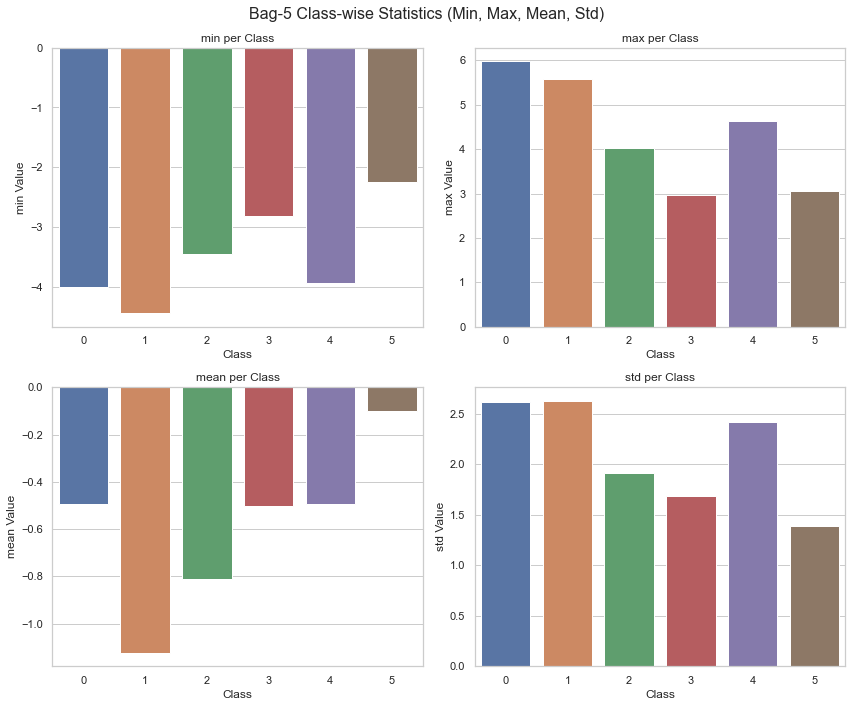

In [39]:
bag=5
vis_data=create_data_for_vis(stats[bag],"mean")
df = pd.DataFrame(vis_data)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# List of statistics for plotting
statistics = ['min', 'max', 'mean', 'std']

# Plot each statistic in a separate subplot
for i, stat in enumerate(statistics):
    ax = axes[i//2, i%2]  # Select appropriate subplot axis
    sns.barplot(data=df, x='class', y=stat, ax=ax)
    ax.set_title(f'{stat} per Class')
    ax.set_xlabel('Class')
    ax.set_ylabel(f'{stat} Value')

fig.suptitle(f'Bag-{bag} Class-wise Statistics (Min, Max, Mean, Std)', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()